In [2]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

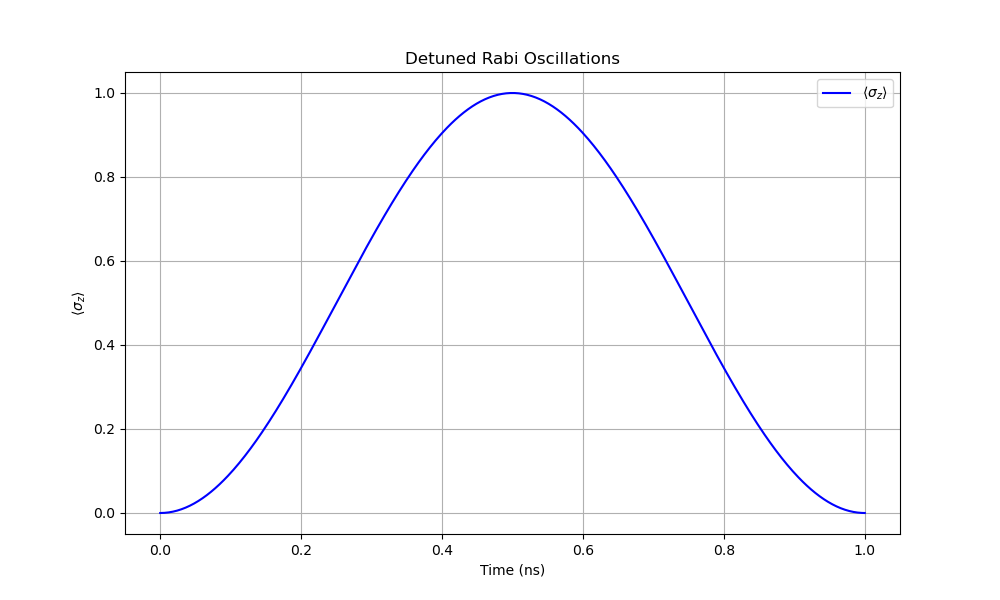

Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[-9.99506596e-01+0.03140922j]
 [ 4.99855181e-06+0.00015758j]]


In [35]:
# Parameters
Omega = 2 * np.pi * 1.0  # Rabi frequency (GHz)
Delta = 2 * np.pi * 0.01  # Detuning (GHz)
t_max = 2 * np.pi / Omega  # Maximum simulation time (ns)
num_steps = 500  # Number of time steps

# Operators
proj_e = basis(2, 1) * basis(2, 1).dag()

# Hamiltonian for detuned Rabi oscillations
H = (Omega / 2) * sigmax() + Delta * proj_e

# Initial state: start in the ground state |0>
psi0 = basis(2, 0)

# Time vector
t_list = np.linspace(0, t_max, num_steps)

# Solve for the time evolution
result = mesolve(H, psi0, t_list, [], [proj_e], options=dict(store_final_state=True))

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(t_list, result.expect[0], label=r'$\langle \sigma_z \rangle$', color='blue')
plt.xlabel('Time (ns)')
plt.ylabel(r'$\langle \sigma_z \rangle$')
plt.title("Detuned Rabi Oscillations")
plt.legend()
plt.grid()
plt.show()

print(result.final_state)


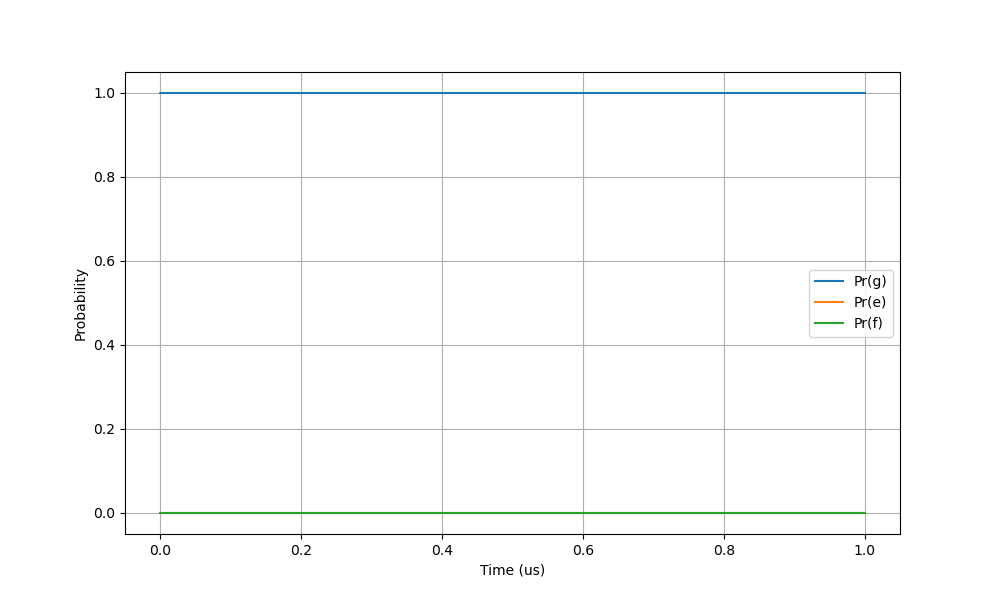

Quantum object: dims=[[4], [4]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 9.99956447e-01+0.00000000e+00j  0.00000000e+00+6.59971789e-06j
  -9.99925763e-04+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00-6.59971789e-06j -1.71409053e-08+0.00000000e+00j
   0.00000000e+00+4.56024951e-08j  0.00000000e+00+0.00000000e+00j]
 [-9.99925763e-04+0.00000000e+00j  0.00000000e+00-4.56024951e-08j
   1.01733698e-06+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  4.24676876e-05+0.00000000e+00j]]

In [286]:
%matplotlib widget

# Parameters
Omega_g = 2 * np.pi * 1.0  # Gate Rabi frequency (MHz)
Omega_c = 2 * np.pi * 1000.0  # Control Rabi frequency (MHz)
Delta = 2 * np.pi * 0.0 # Detuning (MHz)
Gamma = 2 * np.pi * 6.6  # Linewidth (MHz)
t_max = 2 * np.pi / Omega_g # Maximum simulation time (ns)
num_steps = 50000  # Number of time steps

# Delta_LS = Omega_c**2 / (4 * Delta) / 2 / np.pi
# E_plus = 0.5 * (-Delta + np.sqrt(Omega_c**2 + Delta**2)) / 2 / np.pi
# E_minus = 0.5 * (-Delta - np.sqrt(Omega_c**2 + Delta**2)) / 2 / np.pi
# print(f"{Delta_LS = :.2f} MHz")
# print(f"{E_plus = :.2f} MHz")
# print(f"{E_minus = :.2f} MHz")

# Operators
ge_sigx = basis(4, 0) * basis(4, 1).dag() + basis(4, 1) * basis(4, 0).dag()
ef_sigx = basis(4, 1) * basis(4, 2).dag() + basis(4, 2) * basis(4, 1).dag()
proj_g = basis(4, 0) * basis(4, 0).dag()
proj_e = basis(4, 1) * basis(4, 1).dag()
proj_f = basis(4, 2) * basis(4, 2).dag()

# Hamiltonian for detuned Rabi oscillations
H = (Omega_g / 2) * ge_sigx + (Omega_c / 2) * ef_sigx - Delta * basis(4, 2) * basis(4, 2).dag()

# Initial state: start in the ground state |0>
psi0 = basis(4, 0)

# Time vector
t_list = np.linspace(0, t_max, num_steps)

# Solve for the time evolution
result = mesolve(
    H, psi0, t_list, 
    c_ops=[np.sqrt(Gamma) * basis(4, 3) * basis(4, 2).dag()], 
    e_ops=[proj_g, proj_e, proj_f], 
    options=dict(store_final_state=True))

# Plot results
labels = ['Pr(g)', 'Pr(e)', 'Pr(f)']
plt.figure(figsize=(10, 6))
for i, label in enumerate(labels):
    plt.plot(t_list, result.expect[i], label=label)
plt.xlabel('Time (us)')
plt.ylabel('Probability')
plt.legend()
plt.grid()
plt.show()

result.final_state


In [5]:
def get_simulated_superoperator(Omega_g, Omega_c, Delta, Gamma, num_steps=2000):

    # Parameters
    # Omega_g = 2 * np.pi * 1.0  # Gate Rabi frequency (MHz)
    # Omega_c = 2 * np.pi * 510.0  # Control Rabi frequency (MHz)
    # Delta = 2 * np.pi * 649.0 # Detuning (MHz)
    # Gamma = 2 * np.pi * 6.6  # Linewidth (MHz)
    t_max = 2 * np.pi / Omega_g # Maximum simulation time (ns)
    # num_steps = 20000  # Number of time steps

    # Operators
    ge_sigx = basis(5, 1) * basis(5, 2).dag() + basis(5, 2) * basis(5, 1).dag()
    ef_sigx = basis(5, 2) * basis(5, 3).dag() + basis(5, 3) * basis(5, 2).dag()
    proj_g = basis(5, 1) * basis(5, 1).dag()
    proj_e = basis(5, 2) * basis(5, 2).dag()
    proj_f = basis(5, 3) * basis(5, 3).dag()

    # Hamiltonian for detuned Rabi oscillations
    H = (Omega_g / 2) * ge_sigx + (Omega_c / 2) * ef_sigx - Delta * basis(5, 3) * basis(5, 3).dag()

    # Initial state: start in the ground state |0>
    # psi0 = (basis(5, 0) + basis(5, 1)) / np.sqrt(2)
    rho_initial_00 = basis(5, 0) * basis(5, 0).dag()
    rho_initial_01 = basis(5, 0) * basis(5, 1).dag()
    rho_initial_10 = basis(5, 1) * basis(5, 0).dag()
    rho_initial_11 = basis(5, 1) * basis(5, 1).dag()

    # Time vector
    t_list = np.linspace(0, t_max, num_steps)

    # Solve for the time evolution
    result00 = mesolve(
        H, rho_initial_00, t_list, 
        c_ops=[np.sqrt(Gamma) * basis(5, 4) * basis(5, 3).dag()], 
        e_ops=[proj_g, proj_e, proj_f], 
        options=dict(store_final_state=True))
    result01 = mesolve(
        H, rho_initial_01, t_list, 
        c_ops=[np.sqrt(Gamma) * basis(5, 4) * basis(5, 3).dag()], 
        e_ops=[proj_g, proj_e, proj_f], 
        options=dict(store_final_state=True))
    result10 = mesolve(
        H, rho_initial_10, t_list, 
        c_ops=[np.sqrt(Gamma) * basis(5, 4) * basis(5, 3).dag()], 
        e_ops=[proj_g, proj_e, proj_f], 
        options=dict(store_final_state=True))
    result11 = mesolve(
        H, rho_initial_11, t_list, 
        c_ops=[np.sqrt(Gamma) * basis(5, 4) * basis(5, 3).dag()], 
        e_ops=[proj_g, proj_e, proj_f], 
        options=dict(store_final_state=True))

    rho_final_00 = result00.final_state
    rho_final_01 = result01.final_state
    rho_final_10 = result10.final_state
    rho_final_11 = result11.final_state

    subspace_vec_final_00 = operator_to_vector(Qobj(rho_final_00[:2,:2]))[:,:]
    subspace_vec_final_10 = operator_to_vector(Qobj(rho_final_10[:2,:2]))[:,:]
    subspace_vec_final_01 = operator_to_vector(Qobj(rho_final_01[:2,:2]))[:,:]
    subspace_vec_final_11 = operator_to_vector(Qobj(rho_final_11[:2,:2]))[:,:]

    super_op_sim = Qobj(np.column_stack((
        subspace_vec_final_00, 
        subspace_vec_final_10, 
        subspace_vec_final_01, 
        subspace_vec_final_11)))

    return super_op_sim

# # Plot results
# labels = ['Pr(g)', 'Pr(e)', 'Pr(f)']
# plt.figure(figsize=(10, 6))
# for i, label in enumerate(labels):
#     plt.plot(t_list, result.expect[i], label=label)
# plt.xlabel('Time (us)')
# plt.ylabel('Probability')
# plt.legend()
# plt.grid()
# plt.show()

# final_state = result.final_state


In [6]:
def calculate_fidelity(actual_superop: Qobj, ideal_superop: Qobj):
    vec = np.array(actual_superop[:,:]) @ np.array([1, 0, 0, 1])
    arr = Qobj(np.array([[vec[0], vec[1]], [vec[2], vec[3]]]))
    leakage = 1 - (arr.tr() / 2)
    process_fidelity = 1/4 * Qobj(ideal_superop.dag()[:,:] @ actual_superop[:,:]).tr()
    return np.real((2 * process_fidelity + 1 - leakage) / 3)

In [7]:
Omega_g = 2 * np.pi * 1.0  # MHz
Omega_c_arr = 2 * np.pi * np.linspace(100, 2000, 30)  # MHz
Delta_arr = 2 * np.pi * np.linspace(100, 3000, 30)  # MHz
Gamma = 2 * np.pi * 6.6  # MHz
on_off_power_contrast = 1e-4
ideal_gate = Qobj(np.array([
    [1, 0, 0, 0],
    [0,-1, 0, 0],
    [0, 0,-1, 0],
    [0, 0, 0, 1]
]))

infidelity_no_gate_arr = []
infidelity_gate_arr = []
for Omega_c in Omega_c_arr:
    temp_no_gate = []
    temp_gate = []
    for Delta in Delta_arr:
        super_op_sim_no_gate = get_simulated_superoperator(Omega_g, Omega_c, Delta, Gamma)
        super_op_sim_gate = get_simulated_superoperator(Omega_g, np.sqrt(on_off_power_contrast) * Omega_c, Delta, Gamma)
        infidelity_no_gate = 1 - calculate_fidelity(super_op_sim_no_gate, identity(4))
        infidelity_gate = 1 - calculate_fidelity(super_op_sim_gate, ideal_gate)
        temp_no_gate.append(infidelity_no_gate)
        temp_gate.append(infidelity_gate)
    infidelity_no_gate_arr.append(temp_no_gate)
    infidelity_gate_arr.append(temp_gate)

In [8]:
infidelity_no_gate_arr = np.array(infidelity_no_gate_arr)
infidelity_gate_arr = np.array(infidelity_gate_arr)

In [74]:
import pickle

data = {
    'omega_g': Omega_g,
    'on_off_power_contrast': on_off_power_contrast,
    'Gamma': Gamma,
    'detuning': Delta_arr,
    'omega_c': Omega_c_arr,
    'infidelity_no_gate_arr': infidelity_no_gate_arr,
    'infidelity_gate_arr': infidelity_gate_arr
}

with open('./data/infidelity_2d_scan_detuning_rabifreq.pkl', 'wb') as file:
    pickle.dump(data, file)

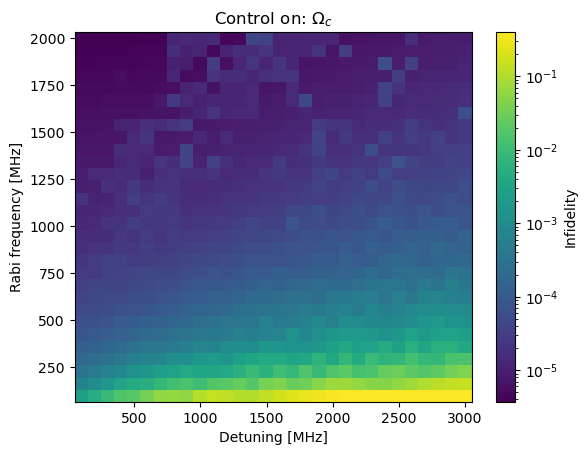

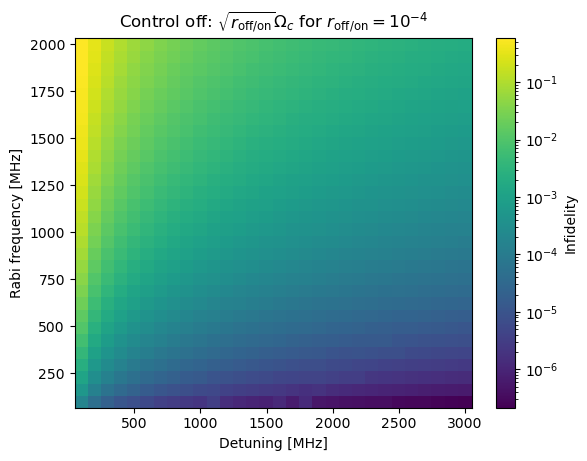

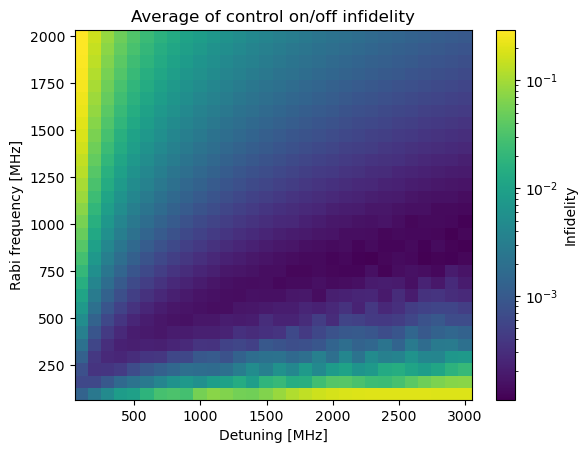

In [9]:
from matplotlib.colors import LogNorm

scale = 2 * np.pi

plt.figure()
plt.title('Control on: $\Omega_c$')
plt.pcolor(Delta_arr / scale, Omega_c_arr / scale, infidelity_no_gate_arr, norm=LogNorm())
plt.xlabel('Detuning [MHz]')
plt.ylabel('Rabi frequency [MHz]')
cbar = plt.colorbar()
cbar.set_label('Infidelity')

plt.figure()
plt.title('Control off: $\sqrt{r_\\text{off/on}} \Omega_c$ for $r_\\text{off/on} = 10^{-4}$')
plt.pcolor(Delta_arr / scale, Omega_c_arr / scale, infidelity_gate_arr, norm=LogNorm())
plt.xlabel('Detuning [MHz]')
plt.ylabel('Rabi frequency [MHz]')
cbar = plt.colorbar()
cbar.set_label('Infidelity')

plt.figure()
plt.title('Average of control on/off infidelity')
infidelity = (infidelity_no_gate_arr + infidelity_gate_arr) / 2
plt.pcolor(Delta_arr / scale, Omega_c_arr / scale, infidelity, norm=LogNorm())
plt.xlabel('Detuning [MHz]')
plt.ylabel('Rabi frequency [MHz]')
cbar = plt.colorbar()
cbar.set_label('Infidelity')

[ 3  4  5  7  7  8  9  9 10 10 11 11 12 13 13 13 15 15 15 15 16 16 17 18
 19 17 17 18 18 19]


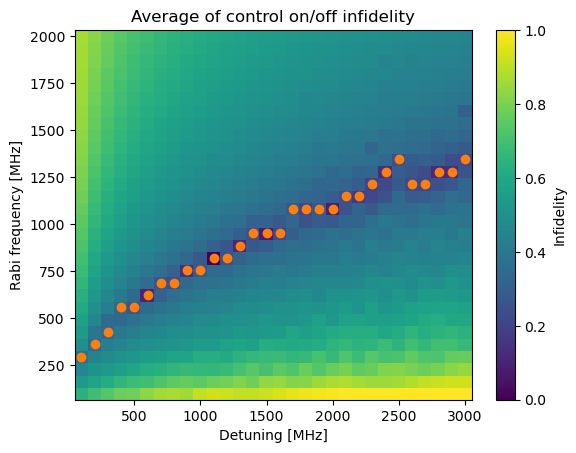

In [90]:
plt.figure()
plt.title('Average of control on/off infidelity')
infidelity = np.abs(10 * infidelity_no_gate_arr - 1 * infidelity_gate_arr)
idxs = np.argmin(infidelity, axis=0)
print(idxs)
plt.pcolor(Delta_arr / scale, Omega_c_arr / scale, infidelity, norm=LogNorm())
plt.scatter(Delta_arr / scale, Omega_c_arr[idxs] / scale, c='C1')
plt.xlabel('Detuning [MHz]')
plt.ylabel('Rabi frequency [MHz]')
cbar = plt.colorbar()
cbar.set_label('Infidelity')

In [91]:
gate_fids = []
no_gate_fids = []
for i, j in enumerate(idxs):
    gate_fids.append(infidelity_gate_arr[j,i])
    no_gate_fids.append(infidelity_no_gate_arr[j,i])

In [66]:
45**2 / 2 / np.pi

322.28875976108804

In [69]:
(2 * np.pi * 1000)**2 / (2 * np.pi * 3000) / 2 / np.pi

333.3333333333333

In [72]:
l1 = 496.8276e-9
l2 = 496.8277e-9
c = 3e8

(c/l1 - c/l2)/1e6

121.537343375

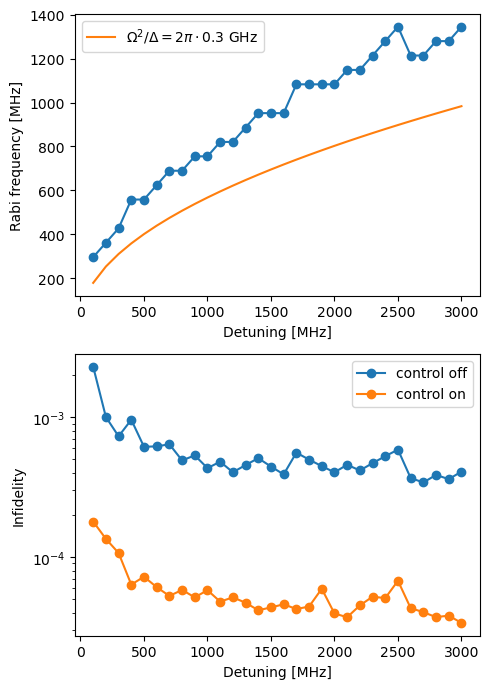

In [92]:
fig, ax = plt.subplots(figsize=(5,7),nrows=2)
ax[0].plot(Delta_arr / scale, Omega_c_arr[idxs] / scale, 'o-', c='C0')
ax[0].plot(Delta_arr / scale, 45*np.sqrt(Delta_arr) / scale, c='C1', label="$\Omega^2/\Delta = 2\pi \cdot 0.3$ GHz")
ax[0].legend()
ax[0].set_xlabel('Detuning [MHz]')
ax[0].set_ylabel('Rabi frequency [MHz]')
ax[1].plot(Delta_arr / scale, gate_fids, 'o-', label='control off')
ax[1].plot(Delta_arr / scale, no_gate_fids, 'o-', label='control on')
ax[1].set_ylabel('Infidelity')
ax[1].set_xlabel('Detuning [MHz]')
ax[1].set_yscale('log')
ax[1].legend()
fig.tight_layout()

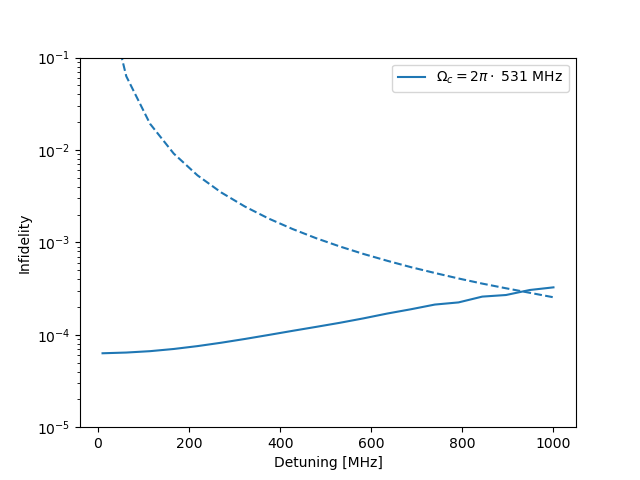

In [284]:
import matplotlib.cm as cm 

colors = cm.viridis(np.linspace(0, 1, len(Omega_c_arr)))

plt.figure()

scale = 2 * np.pi
i = 10
Omega_c = Omega_c_arr[i]
ys = infidelity_no_gate_arr[i,:]
ys2 = infidelity_gate_arr[i,:]
plt.plot(
    Delta_arr / scale, ys, 
    color=f"C{i}", #colors[i],
    label=f"$\Omega_c = 2\pi \cdot$ {Omega_c / scale :.0f} MHz")
plt.plot(
    Delta_arr / scale, ys2, 
    linestyle='--',
    color=f"C{i}") #colors[i],
    #label=f"$\Omega_c = 2\pi \cdot$ {Omega_c / scale :.0f} MHz")
plt.ylim(1e-5, 1e-1)
plt.ylabel('Infidelity')
plt.xlabel('Detuning [MHz]')
plt.yscale('log')
# plt.xscale('log')
plt.legend()

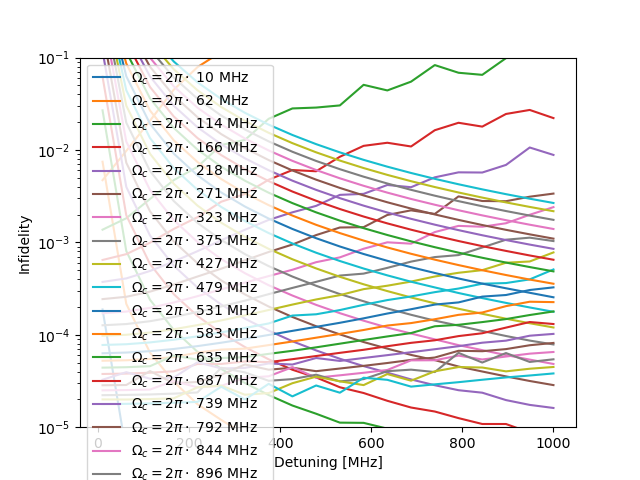

In [282]:
import matplotlib.cm as cm 

colors = cm.viridis(np.linspace(0, 1, len(Omega_c_arr)))

plt.figure()

scale = 2 * np.pi
for i, Omega_c in enumerate(Omega_c_arr):
    ys = infidelity_no_gate_arr[i,:]
    ys2 = infidelity_gate_arr[i,:]
    plt.plot(
        Delta_arr / scale, ys, 
        color=f"C{i}", #colors[i],
        label=f"$\Omega_c = 2\pi \cdot$ {Omega_c / scale :.0f} MHz")
    plt.plot(
        Delta_arr / scale, ys2, 
        color=f"C{i}") #colors[i],
        #label=f"$\Omega_c = 2\pi \cdot$ {Omega_c / scale :.0f} MHz")
plt.ylim(1e-5, 1e-1)
plt.ylabel('Infidelity')
plt.xlabel('Detuning [MHz]')
plt.yscale('log')
# plt.xscale('log')
plt.legend()

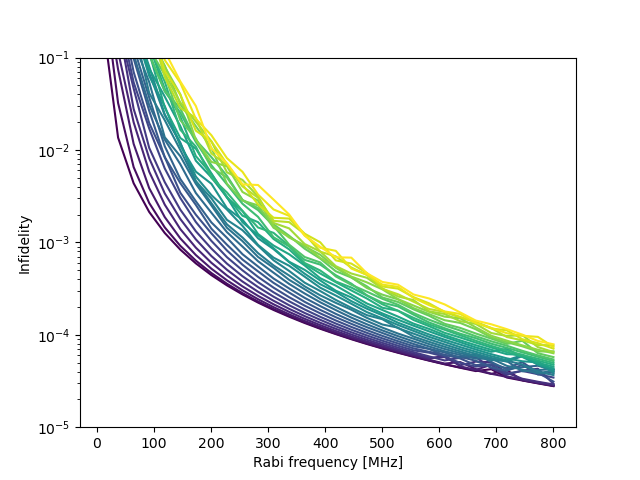

In [252]:
import matplotlib.cm as cm 

colors = cm.viridis(np.linspace(0, 1, len(Omega_c_arr)))
scale = 2 * np.pi

plt.figure()
for i, Delta in enumerate(Delta_arr):
    ys = infidelity_arr[:,i]
    plt.plot(
        Omega_c_arr / scale, ys, 
        color=colors[i],
        label=f"$\Delta = 2\pi \cdot$ {Delta / scale :.0f} MHz")
plt.ylim(1e-5, 1e-1)
plt.ylabel('Infidelity')
plt.xlabel('Rabi frequency [MHz]')
plt.yscale('log')
# plt.legend()

In [99]:
gate_rabi_freq = 2 * np.pi * 1e6
Gamma = 2 * np.pi * 6.6e6
detunings = 2 * np.pi * np.linspace(10, 5000, 30) * 1e6
rabi_freqs = 2 * np.pi * np.linspace(10, 1000, 30) * 1e6

result = []
for detuning in detunings:
    temp = []
    for rabi_freq in rabi_freqs:
        delta_ls = rabi_freq**2 / (4 * detuning)
        error_rot = (gate_rabi_freq / delta_ls)**2
        error_sca = np.sqrt(error_rot) * Gamma / detuning
        total_error = error_rot + error_sca
        temp.append(total_error)
    result.append(temp)
        
result = np.array(result)

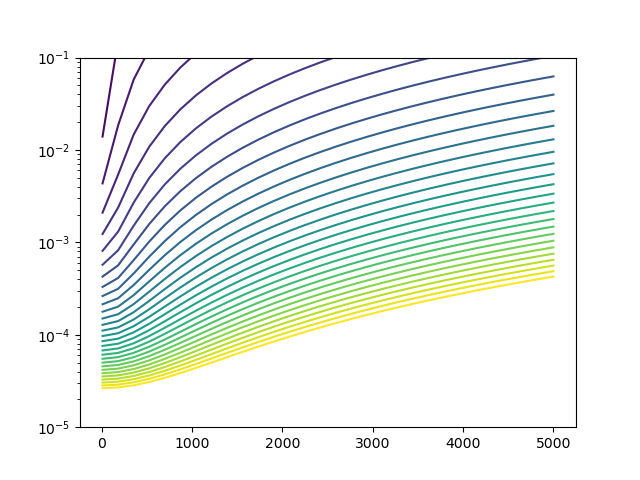

In [100]:
import matplotlib.cm as cm 

colors = cm.viridis(np.linspace(0, 1, len(rabi_freqs)))

plt.figure()
scale = 2 * np.pi * 1e6
for i, rabi_freq in enumerate(rabi_freqs):
    ys = result[:,i]
    plt.plot(
        detunings / scale, ys, 
        color=colors[i],
        label=f"$\Omega_c = 2\pi \cdot$ {rabi_freq / scale :.0f} MHz")
plt.ylim(1e-5, 1e-1)
plt.yscale('log')
# plt.legend()

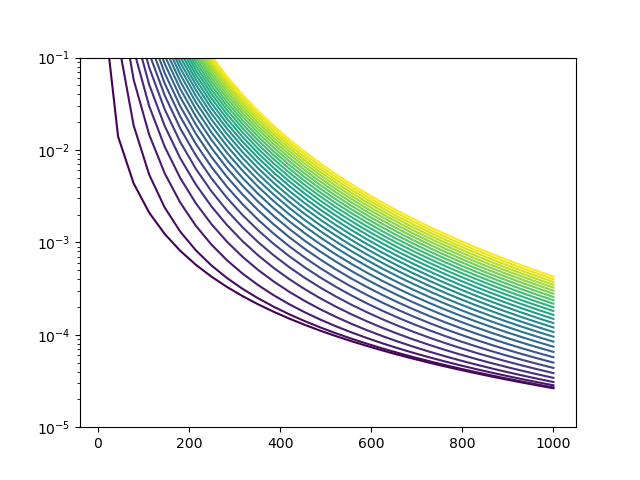

In [101]:
import matplotlib.cm as cm 

colors = cm.viridis(np.linspace(0, 1, len(detunings)))

plt.figure()
scale = 2 * np.pi * 1e6
for i, detuning in enumerate(detunings):
    ys = result[i,:]
    plt.plot(
        rabi_freqs / scale, ys, 
        color=colors[i],
        label=f"$\Omega_c = 2\pi \cdot$ {rabi_freq / scale :.0f} MHz")
plt.ylim(1e-5, 1e-1)
plt.yscale('log')
# plt.legend()